# Time Series Econometrics with Python
## Section 2.1.: Stationary and Non-Stationary Series

### Carlos Góes (Instituto Mercado Popular)

# Stationarity

Data are stationary when their expected value and variance do not change over time. These exclude, then, data that have seasonal patterns (think of temperatures over the year) and data that have trends (think of GDP). The expected temperature in Los Angeles in July is different than the expected temperature for the same city in December (one should expect December to be colder). Likewise, the expected GDP of the United Kingom 2013 will be different from the expected GDP of the UK in 2113 (one should expect it to be higher in 2113 due to technological advancement and productivity gains).

We usually try to work with stationary data before designing a econometric model. If these are not available, we make adjustments and transformations in the data to make inference more reliable and make non-stationary data close to stationarity. We will deal with seasonality and trends later. For now, we will learn about some kinds of stationary and non-stationary data and why do we try to work with stationary data.

## Okay, so what does stationary data look like?

We will compare two different kinds of randomly generated processes so you can have an idea: white noises and random walks.

An example of stationary data is white noise, formally defined as a stochastic (i.e., random) process with zero autocorrelation. $y$ is a white noise process if: 

\begin{eqnarray}
    y_t &=& e_{t}, \qquad where \\
    E[\epsilon_t] &=& 0, \qquad
    E[\epsilon_t^2] = \sigma^2, \qquad
    E[\epsilon_te_s] = 0_{\quad t \not= s}, \qquad  
    E[y_t] = 0 \nonumber
\end{eqnarray}

In a white noise process, besides being randomly generated, the value of $y$ at period $t$ is unrelated to the value of $y$ in period $t-1$ \footnote{This is exactly what the expression $E[\epsilon_te_s] = 0_{\quad t \not= s}$ means: the expected value of $e$ at period $t$ $(E[\epsilon_t])$ and the expected value of $e$ at period $s$ $(E[e_s])$ will be zero, regardless of their independent actual values}. All values will orbit a certain mean, which is the fixed expected value around which the distribution of random terms is centered (in this case, zero).

In [103]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

# Define length of time series

tlength = 10000


Generate and plot a stationary series using the built-in command

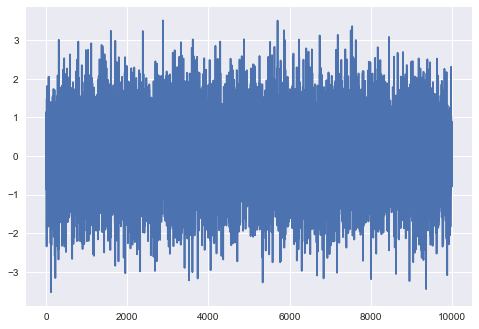

In [104]:
stationary = np.random.randn(tlength)
plt.plot(stationary)
plt.show()
sns.despine()

We can also do that using a loop. Try to understand the difference between those two in programming terms. (This will be useful when we generate other kinds of data).

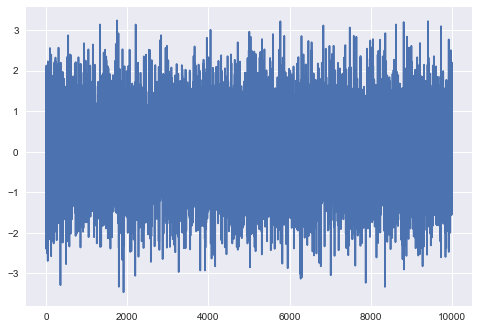

In [105]:
holder = [] 

for i in range(tlength):
    e = np.random.randn()
    holder.append(e)


plt.plot(holder)
plt.show()

# Random Walks

Now let's compare this with a different kind of stochastic process: random walks.

In a random walk, the value of $y$ at period $t$ is influenced by past values of the $y$ itself. A random walk is a process in which a random term at $t$ is added to the value of $y$ at $t-1$. Unlike a white noise process, the mean of the series will not be fixed. In fact, since the expected value of the random term is zero, the expected value of $y$ will be the past value of $y$ itself!

A random walk will have a randomly generated ("stochastic") trend and will not converge to a expected mean. Since they do not converge to an expected value, random walks are non-stationary processes. They are also called explosive processes, meaning that over the long run the values of $y$ will tend to be very far from the initial value at first period of the series. Mathematically, a random walk is defined as follows:

$\begin{eqnarray}
    z_t &=& \beta L(z_{t}) + \epsilon_t, \\
    where \beta &\equiv& 1, \qquad E[\epsilon_t] = 0 \nonumber, \\
    hence \ E[z_t] &=& L(z_t) \nonumber
\end{eqnarray}$

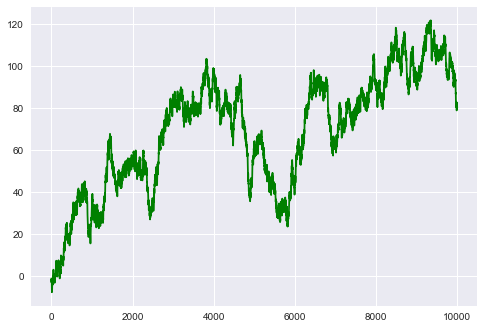

In [106]:
# Generate and plot a non-stationary series using a loop

holder = [] 

for i in range(tlength):
    if i == 0:  # generates a random observation for the first period
        b = np.random.randn()
        holder.append(b)    
    else: # adds a new random number to the past observations for subsequent observations
        e = np.random.randn()
        b = holder[i-1] + e
        holder.append(b)

plt.plot(holder, 'green')
plt.show()

Now create a program that uses that loop so you can use it many times in the future.

In [107]:
def nonstationary(n):
    holder = []
    for i in range(n):
        if i == 0:
            b = np.random.randn()
            holder.append(b)    
        else:
            e = np.random.randn()
            b = holder[i-1] + e
            holder.append(b)
    return holder

# Generalize stationary series generators as a program

def arstationary(n,alpha):
    if alpha >= 1:
        print("Alpha needs to be smaller than one")
    else:
        holder = []
        for i in range(n):
            if i == 0:
                b = np.random.randn()
                holder.append(b)    
            else:
                e = np.random.randn()
                b = alpha * holder[i-1] + e
                holder.append(b)
        return holder

Now you can use such program to generate as many nonstationary series as you want and compare them with a stationary series.

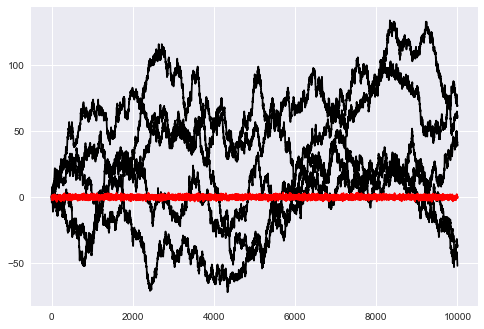

In [108]:
# Define number of non-stationary series to be created

wide = 5

matrixns = np.matrix([[0 for x in range(wide)] for y in range(tlength)])

for i in range(wide):
    data = nonstationary(tlength)
    matrixns[:,i] = np.transpose(np.matrix(data))
    plt.plot(matrixns[:,i], 'black')

plt.plot(stationary, 'red')
    
plt.show()

# Auto-regressive and stationary series

You should have noted that we defined $\beta \equiv 1$ in the equation above. This was not random (or should we say stochastic?). Not every process in which a variable is dependent on past values of itself will be non-stationary. Regardless of how long it takes to converge, if a time series converges to a long-run mean or deterministic trend, it will be trend stationary.

Imagine a process that is similar to a random walk, but in which the coefficient $\beta$ is smaller than one. A slightly smaller coefficient of $0.8$ will be sufficient to demonstrate that, unlike a random walk, this stationary process will converge to a expected mean. Take the following model:

\begin{eqnarray}
    q_t &=& \kappa L(q_t) + \epsilon_t, \\
    where \ \kappa &\equiv& 0.8, \qquad E[\epsilon_t] = 0 \nonumber
\end{eqnarray}

With a random walk it shares the fact that it will have persistence. The values of the variable will be correlated with its past values. Now imagine what happens if we observe the data and find out that $q_t = 1$. 

\begin{eqnarray}
    q_t &=& 1, \\
    E[q_{t+1}] &=& 0.8 q_t + E[e_{t+2}] = 0.8 * 1 + 0 = 0.8 \nonumber \\
    E[q_{t+2}] &=& 0.8 E[q_{t+1}] + E[e_{t+2}] = 0.8^2 + 0 = 0.64 \nonumber \\
    E[q_{t+3}] &=& 0.8 E[q_{t+2}] + E[e_{t+3}] = 0.8^3 + 0 = 0.512 \nonumber \\
    ... \nonumber \\
    E[q_{t+40}] &=&  0.8^4 + 0 = 0.0001 \nonumber \\
    ... \nonumber \\
    E[q_{t+\infty}] &=&  0.8^\infty \to 0 \nonumber
\end{eqnarray}

In other words, as time goes by, $q$ will tend to converge (or rather, orbit, due to the random innovations) to its expected value, which in this case is zero. This will be true for all processes that look like equation $(8)$ above, as long as the coefficient $\kappa$ is smaller than $1$, or, in mathematical notation:

\begin{eqnarray}
    q_t &=& \kappa L(q_t) + \epsilon_t, \\
    E[q_{t+k}] &=& \kappa L^k(q_t) + E[e_{t+k}] = \kappa^k \nonumber \\
    \lim_{k\to\infty} E[q_{t+k}] &=& \kappa^k = 0, \quad \forall \quad |\kappa| < 1 \nonumber
\end{eqnarray}

Create a program to create many persistent but stationary series.

In [109]:
def arstationary(n,alpha):
    if alpha >= 1:
        print("Alpha needs to be smaller than one")
    else:
        holder = []
        for i in range(n):
            if i == 0:
                b = np.random.randn()
                holder.append(b)    
            else:
                e = np.random.randn()
                b = alpha * holder[i-1] + e
                holder.append(b)
        return holder

See graphically what we mean by "stationary" and "explosive" processes. The series below were both generated with a process similar to those we just mentioned, with an autoregressive coefficient (i.e., the coefficient that measures the level of persistence: the relationship with the lagged variable) and a random error. The difference between them is that in one of them the coefficient is $0.9$ and in the other one it is equal to $1$. The former (which is stationary) will orbit the expected value of zero, while the latter (which is non-stationary) will proceed freely in its random walk. Look what a difference a mere $0.1$ makes when the time dimension grows large.

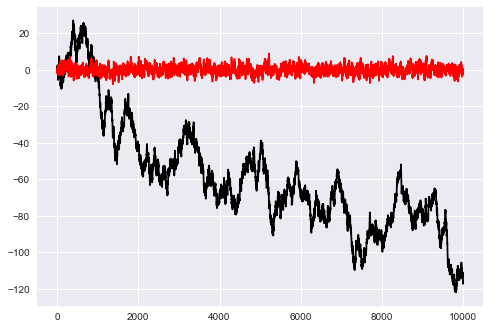

In [110]:
nstationary = nonstationary(tlength)
stationary = arstationary(tlength,0.9)
plt.plot(nstationary, 'black',
         stationary, 'red')
    
plt.show()

# Order of Integration and Spurious Regressions

Statisticians use the concept order of integration to differentiate between stationary and non-stationary data. The intuition behind the term is that after you take first differences of an equation it will move closer to stationarity. Remember the equation above: 

\begin{eqnarray}
    z_t &=& L(z_{t}) + \epsilon_t, \qquad E[z_t] = L(z_t)\\
    E[\Delta z_t] &=& z_t - L(z_{t}) \nonumber \\
    E[\Delta z_t] &=& (L(z_t) + \epsilon_t) - L(Z_{t}) \nonumber \\
    E[\Delta z_t] &=& \epsilon_t,  \qquad which \ is \ a \ stationary \ white \ noise \ process \nonumber
\end{eqnarray}

It took us one differentiation to turn $z$ into a stationary process. In the jargon, $z$'s order of integration is one, or, more synthetically, it is a I(1) process. Conversely, the white noise process $y$ represented in equation above was stationary to begin with. We did not need to differentiate it, so it is known as a I(0) process - i.e., its order of integration is zero!

## But what is the problem with non-stationary data to begin with? Why are we even concerned with stationarity?

The problem is that if you regress one $I(1)$ (i.e., non-stationary) variable on another $I(1)$ variable you might end up getting statistically significant coefficients even if there is no reasonable relationship between the variables. In fact, that can happen even with two purely randomly generated random walks. This nonsensical statistically significant relationship is what is called a spurious regression.

The chart below shows a spurious correlation between two stochastically generated random walks. Since they are random, there is obviously no relationship between the variables. Yet, you might be led to believe there is:

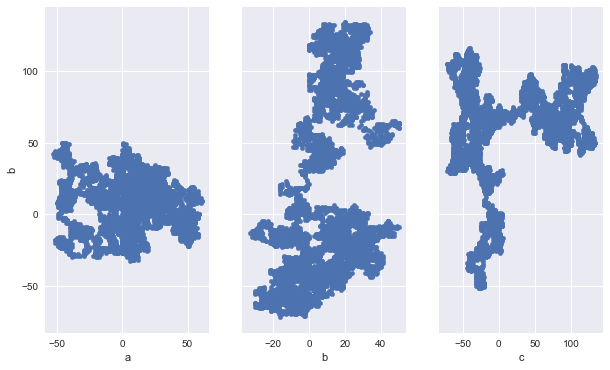

In [111]:
# Define dataframe from simulated series
df = pd.DataFrame(matrixns, columns=('a','b','c','d','e'))

fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='a', y='b', ax=axs[0], figsize=(10, 6))
df.plot(kind='scatter', x='b', y='c', ax=axs[1])
df.plot(kind='scatter', x='c', y='d', ax=axs[2])
plt.show()

In fact, if you run regressions to check for statistical significance, you you'll realize there are indeed spurious relationships.

In [112]:
# Fit Linear models
lm = smf.ols(formula='a ~ b', data = df).fit()
lm2 = smf.ols(formula='b ~ c', data = df).fit()
lm3 = smf.ols(formula='c ~ d', data = df).fit()
lm4 = smf.ols(formula='d ~ e', data = df).fit()

In [113]:
# Print outputs
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      a   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     62.03
Date:                Thu, 23 Mar 2017   Prob (F-statistic):           3.73e-15
Time:                        02:51:19   Log-Likelihood:                -46437.
No. Observations:               10000   AIC:                         9.288e+04
Df Residuals:                    9998   BIC:                         9.289e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     10.3026      0.285     36.146      0.000         9.744    10.861
b             -0.1202      0.015     -7.876      0.000        -0.150    -0.090
==============================================================================
Omnibus:                      419.557   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              435.388
Skew:                          -0.482   Prob(JB):                     2.86e-95
Kurtosis:                       2.662   Cond. No.                         21.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      b   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     1656.
Date:                Thu, 23 Mar 2017   Prob (F-statistic):               0.00
Time:                        02:51:19   Log-Likelihood:                -41442.
No. Observations:               10000   AIC:                         8.289e+04
Df Residuals:                    9998   BIC:                         8.290e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.4569      0.156     47.774      0.000         7.151     7.763
c              0.0998      0.002     40.695      0.000         0.095     0.105
==============================================================================
Omnibus:                      278.595   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.253
Skew:                           0.245   Prob(JB):                     3.28e-44
Kurtosis:                       2.509   Cond. No.                         65.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      c   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     981.2
Date:                Thu, 23 Mar 2017   Prob (F-statistic):          1.53e-205
Time:                        02:51:20   Log-Likelihood:                -55031.
No. Observations:               10000   AIC:                         1.101e+05
Df Residuals:                    9998   BIC:                         1.101e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -14.6688      1.073    -13.665      0.000       -16.773   -12.565
d              0.5119      0.016     31.324      0.000         0.480     0.544
==============================================================================
Omnibus:                     6772.010   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              630.930
Skew:                           0.191   Prob(JB):                    9.89e-138
Kurtosis:                       1.830   Cond. No.                         119.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     675.6
Date:                Thu, 23 Mar 2017   Prob (F-statistic):          3.39e-144
Time:                        02:51:20   Log-Likelihood:                -49794.
No. Observations:               10000   AIC:                         9.959e+04
Df Residuals:                    9998   BIC:                         9.961e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     69.2295      0.660    104.878      0.000        67.936    70.523
e             -0.3649      0.014    -25.993      0.000        -0.392    -0.337
==============================================================================
Omnibus:                      924.673   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1197.713
Skew:                          -0.825   Prob(JB):                    8.32e-261
Kurtosis:                       3.391   Cond. No.                         88.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""